## Assessing feature importance with random forests

Using a random forest, we can measure the feature importance as the averaged impurity decrease computed from all decision trees in the forest, without making any assumptions about whether our data is linearly separable or not.

Tree-based models doesn't require standardized or normalized features.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Exploring feature importance with wine dataset

In [2]:
df = pd.read_csv('./wine.data', header=None)
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
print('Class labels', np.unique(df['Class label']))
df.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = df.iloc[:, 1:]
y = df['Class label']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


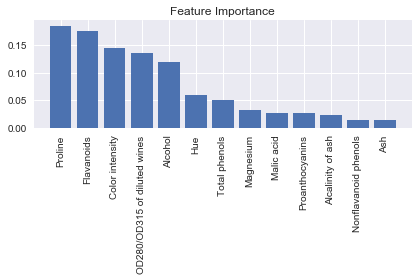

In [5]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

The feature importance values are normalized so that they sum to 1.0

Given the above graph we can see that proline and flavanoid are the most important features given this dataset.

Let's reuse the code and use it on different dataset to determine the feature importances

In [6]:
from sklearn.ensemble import RandomForestClassifier
class feat_importances():
    
    def __init__(self, n_estimators=500, test_size=0.3, random_state=1):
        self.test_size = test_size
        self.random_state = random_state
        self.n_estimators = n_estimators
    
    def get_feat_importances(self, X, y):
        print("Feature ranking:")
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

        # optional hyperparameters tuning for rf: criterion='gini', max_depth=300, min_samples_split=3, min_samples_leaf=1
        feat_labels = X.columns
        forest = RandomForestClassifier(n_estimators=self.n_estimators, random_state=self.random_state)
        
        forest.fit(X_train, y_train)
        importances = forest.feature_importances_

        indices = np.argsort(importances)[::-1]
        
        for f in range(X_train.shape[1]):
            print("%2d) %-*s %f" % (indices[f], 30, feat_labels[indices[f]], importances[indices[f]]))
        plt.title('Feature Importance')
        plt.bar(range(X_train.shape[1]), importances[indices], align='center')
        plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.tight_layout()
        plt.show()
      
        
    #def plot_feat_importances():

Feature ranking:
12) Proline                        0.178209
 6) Flavanoids                     0.170896
 9) Color intensity                0.130607
11) OD280/OD315 of diluted wines   0.118767
 0) Alcohol                        0.108576
10) Hue                            0.089635
 5) Total phenols                  0.056197
 1) Malic acid                     0.039554
 4) Magnesium                      0.037642
 3) Alcalinity of ash              0.024482
 8) Proanthocyanins                0.017584
 2) Ash                            0.016286
 7) Nonflavanoid phenols           0.011564


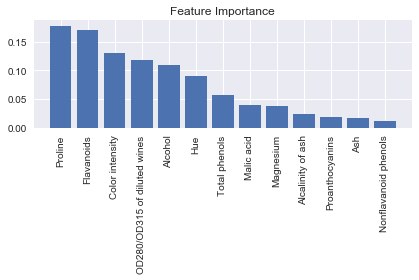

In [7]:
feat_imp = feat_importances()
feat_imp.get_feat_importances(X, y)

### Scikit learn Select from Model

In [8]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:', X_selected.shape[0])

Number of samples that meet this criterion: 124


In [9]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


### Exploring feature importance with iris dataset

In [10]:
df = pd.read_csv('./Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
X = df.iloc[:,1:-1]
y = df['Species']

Feature ranking:
 3) PetalWidthCm                   0.448989
 2) PetalLengthCm                  0.422606
 0) SepalLengthCm                  0.099156
 1) SepalWidthCm                   0.029250


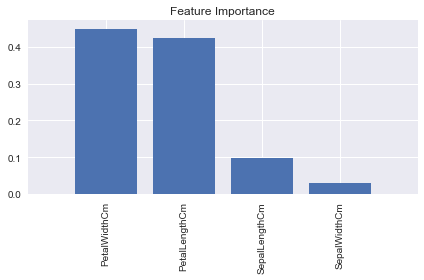

In [12]:
feat_imp = feat_importances()
feat_imp.get_feat_importances(X, y)

It appears that Petal Width and Petal Length are the most importance features.

## Exploring feature importance with German credit dataset

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [14]:
df = pd.read_csv('../dataset/Statlog (German Credit Data) Data Set/german.data', sep=' ', header=None)
df.columns = ['Status_of_existing_checking_account', 'Duration_in_month', 'Credit_history',
             'Purpose', 'Credit_amount', 'Savings_account', 'Present_employment_since',
             'Installment_rate_in_percentage_of_disposable_income', 'Personal_status_and_sex',
             'Other_debtors', 'Present_residence_since', 'Property', 'Age_in_years',
             'Other_installment_plans', 'Housing', 'Number_of_existing_credits_at_this_bank',
             'Job', 'Number_of_people_being_liable_to_provide_maintenance_for', 'Telephone', 'Foreign worker', 'class']

In [15]:
df['class'] = df['class'] - 1

In [16]:
discrete_columns, continuous_columns = [], []
for i, j in enumerate(df.dtypes[:-1]): ## select columns up till class
    if j == object:
        discrete_columns.append(df.columns[i])
    else:
        continuous_columns.append(df.columns[i])

In [17]:
discrete_columns

['Status_of_existing_checking_account',
 'Credit_history',
 'Purpose',
 'Savings_account',
 'Present_employment_since',
 'Personal_status_and_sex',
 'Other_debtors',
 'Property',
 'Other_installment_plans',
 'Housing',
 'Job',
 'Telephone',
 'Foreign worker']

In [18]:
continuous_columns

['Duration_in_month',
 'Credit_amount',
 'Installment_rate_in_percentage_of_disposable_income',
 'Present_residence_since',
 'Age_in_years',
 'Number_of_existing_credits_at_this_bank',
 'Number_of_people_being_liable_to_provide_maintenance_for']

In [19]:
dummy_stseca = pd.get_dummies(df['Status_of_existing_checking_account'], prefix='status_exs_accnt')
dummy_ch = pd.get_dummies(df['Credit_history'], prefix='cred_hist')
dummy_purpose = pd.get_dummies(df['Purpose'], prefix='purpose')
dummy_savacc = pd.get_dummies(df['Savings_account'], prefix='sav_acc')
dummy_presc = pd.get_dummies(df['Present_employment_since'], prefix='pre_emp_snc')
dummy_perssx = pd.get_dummies(df['Personal_status_and_sex'], prefix='per_stat_sx')
dummy_othdts = pd.get_dummies(df['Other_debtors'], prefix='oth_debtors')
dummy_property = pd.get_dummies(df['Property'], prefix='property')
dummy_othinstpln = pd.get_dummies(df['Other_installment_plans'], prefix='oth_inst_plan')
dummy_housing = pd.get_dummies(df['Housing'], prefix='housing')
dummy_job = pd.get_dummies(df['Job'], prefix='job')
dummy_telephn = pd.get_dummies(df['Telephone'], prefix='telephn')
dummy_forgnwrkr = pd.get_dummies(df['Foreign worker'], prefix='forgn_wrkr')

In [20]:
credit_continuous = df[continuous_columns]
df_new = pd.concat([dummy_stseca, dummy_ch, dummy_purpose, dummy_savacc, dummy_presc,
                   dummy_perssx, dummy_othdts, dummy_property, dummy_othdts, dummy_property,
                   dummy_othinstpln, dummy_housing, dummy_job, dummy_telephn, dummy_forgnwrkr, credit_continuous,
                   df['class']], axis=1)
df_new.columns

Index(['status_exs_accnt_A11', 'status_exs_accnt_A12', 'status_exs_accnt_A13',
       'status_exs_accnt_A14', 'cred_hist_A30', 'cred_hist_A31',
       'cred_hist_A32', 'cred_hist_A33', 'cred_hist_A34', 'purpose_A40',
       'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43',
       'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48',
       'purpose_A49', 'sav_acc_A61', 'sav_acc_A62', 'sav_acc_A63',
       'sav_acc_A64', 'sav_acc_A65', 'pre_emp_snc_A71', 'pre_emp_snc_A72',
       'pre_emp_snc_A73', 'pre_emp_snc_A74', 'pre_emp_snc_A75',
       'per_stat_sx_A91', 'per_stat_sx_A92', 'per_stat_sx_A93',
       'per_stat_sx_A94', 'oth_debtors_A101', 'oth_debtors_A102',
       'oth_debtors_A103', 'property_A121', 'property_A122', 'property_A123',
       'property_A124', 'oth_debtors_A101', 'oth_debtors_A102',
       'oth_debtors_A103', 'property_A121', 'property_A122', 'property_A123',
       'property_A124', 'oth_inst_plan_A141', 'oth_inst_plan_A142',
       'oth_inst_plan_A1

In [21]:
X = df_new.iloc[:, :-1]
y = df_new['class']

Feature ranking:
62) Credit_amount                  0.098845
65) Age_in_years                   0.075244
61) Duration_in_month              0.071311
 3) status_exs_accnt_A14           0.044758
 0) status_exs_accnt_A11           0.037201
63) Installment_rate_in_percentage_of_disposable_income 0.036452
64) Present_residence_since        0.030673
 8) cred_hist_A34                  0.028805
19) sav_acc_A61                    0.021215
66) Number_of_existing_credits_at_this_bank 0.017110
 9) purpose_A40                    0.016858
49) oth_inst_plan_A143             0.016119
 1) status_exs_accnt_A12           0.015428
 4) cred_hist_A30                  0.014393
 6) cred_hist_A32                  0.014349
25) pre_emp_snc_A72                0.014272
31) per_stat_sx_A93                0.014258
30) per_stat_sx_A92                0.014224
55) job_A173                       0.014160
26) pre_emp_snc_A73                0.014145
12) purpose_A42                    0.013905
57) telephn_A191             

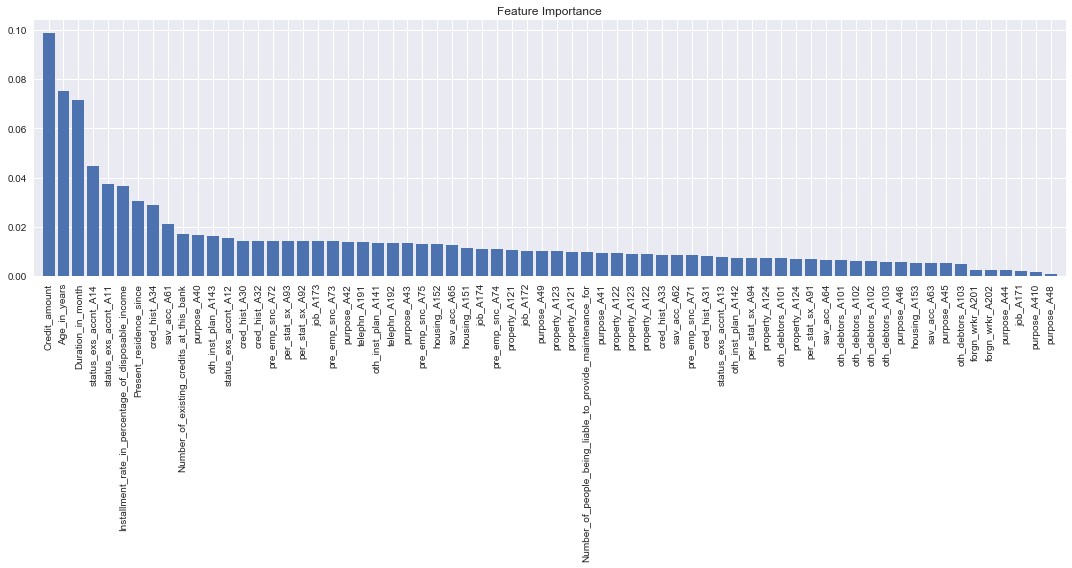

In [22]:
plt.figure(figsize=(15, 8))
feat_imp = feat_importances()
feat_imp.get_feat_importances(X, y)
        

In [23]:
# References and credits to
# Python Machine Learning 2nd